In [55]:
# Combine all chapters into one string
import os


file_paths = [
    "/kaggle/input/game-of-thrones-books/001ssb.txt",
    "/kaggle/input/game-of-thrones-books/002ssb.txt",
    "/kaggle/input/game-of-thrones-books/003ssb.txt",
    "/kaggle/input/game-of-thrones-books/004ssb.txt"
]

# Read and clean the text
text = ""
for file_path in file_paths:
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        text += file.read().lower().replace('\n', ' ') + " "

print("Length of complete text:", len(text))
print(text[:1000])


Length of complete text: 7437786
a game of thrones  book one of a song of ice and fire  by george r. r. martin  prologue  "we should start back," gared urged as the woods began to grow dark around them. "the wildlings are  dead."  "do the dead frighten you?" ser waymar royce asked with just the hint of a smile.  gared did not rise to the bait. he was an old man, past fifty, and he had seen the lordlings come and go.  "dead is dead," he said. "we have no business with the dead."  "are they dead?" royce asked softly. "what proof have we?"  "will saw them," gared said. "if he says they are dead, that's proof enough for me."  will had known they would drag him into the quarrel sooner or later. he wished it had been later rather  than sooner. "my mother told me that dead men sing no songs," he put in.  "my wet nurse said the same thing, will," royce replied. "never believe anything you hear at a woman's  tit. there are things to be learned even from the dead." his voice echoed, too loud in 

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np



# Tokenize words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text[:])
total_words = len(tokenizer.word_index) + 1
print("Total unique words:", total_words)

# Create input sequences
input_sequences = []
tokens = tokenizer.texts_to_sequences([text])[0]
sequence_length = 25
for i in range(sequence_length, len(tokens)):
    seq = tokens[i-sequence_length:i+1]  # 5 input words + 1 target word
    input_sequences.append(seq)

input_sequences = np.array(input_sequences)
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

print("Input shape:", X.shape, "Output shape:", y.shape)


Total unique words: 47
Input shape: (53526, 25) Output shape: (53526, 47)


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=150))

# Stack LSTMs with Dropout
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))

# Output layer for prediction
model.add(Dense(total_words, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the model for summary
model.build(input_shape=(None, sequence_length))
model.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 25, 150)             │           7,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 25, 150)             │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 47)                  │           4,747 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292,797 (1.12 MB)

 Trainable params: 292,797 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [59]:
history = model.fit(
    X, y,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop]
)



Epoch 1/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6064 - loss: 1.0863 - val_accuracy: 0.5320 - val_loss: 1.1042
Epoch 2/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6445 - loss: 0.7406 - val_accuracy: 0.5110 - val_loss: 1.1073
Epoch 3/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6478 - loss: 0.7323 - val_accuracy: 0.5304 - val_loss: 1.0694
Epoch 4/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6545 - loss: 0.7220 - val_accuracy: 0.5329 - val_loss: 1.0607
Epoch 5/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6506 - loss: 0.7196 - val_accuracy: 0.5317 - val_loss: 1.0692
Epoch 6/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6504 - loss: 0.7215 - val_accuracy: 0.5305 - val_loss: 1.0727
Epoch 7/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6553 - loss: 0.7092 - val_accuracy: 0.5336 - val_loss: 1.0710
Epoch 8/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6549 - loss: 0.7133 - val_accuracy: 0

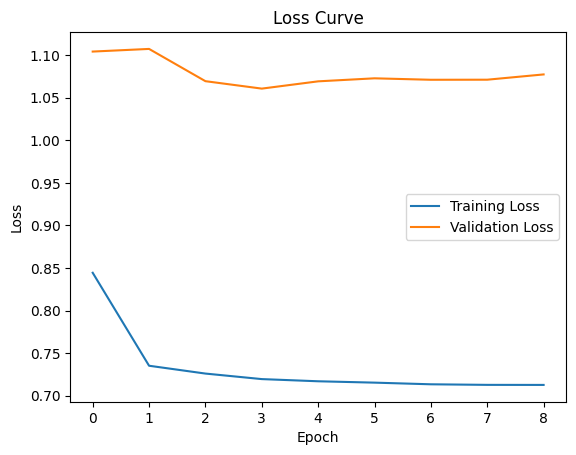

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [61]:
import random

def generate_text(seed_text, next_words=30):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=5, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word = tokenizer.index_word[np.argmax(predicted)]
        seed_text += " " + predicted_word
    return seed_text

# Try 3 different seed texts
print(generate_text("he looked at"))
print(generate_text("winter is coming"))
print(generate_text("the queen said"))


he looked at a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a
winter is coming a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a
the queen said a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a
